<a href="https://colab.research.google.com/github/KieranDingwall/Natural-Language-Processing-Coursework---Kieran-Dingwall/blob/main/NLP_Coursework_V2_(Colab_Version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Coursework

By Kieran Dingwall - Student Number: 2208619

### Section 1 - Dataset Exploring and Pre Processing

Dataset: https://archive.ics.uci.edu/dataset/837/product+classification+and+clustering

For my classification model, I will be using the ‘Product Classification and Clustering’ dataset that can be found on ‘UC Irvine Machine Learning Repository’. This dataset was taken from pricerunner, which is a popular product comparison platform. The dataset includes 35311 products in 10 different categories from 306 different merchants. The aim is to train the model to recognise different products and predict what product category they belong too.

In [2]:
# Imports
import pandas as pd
import numpy as np

# Load Dataset
from google.colab import files, drive #import colab functionality
drive.mount("/content/drive")
# Path to where mine is - This will need changed
path = '/content/drive/MyDrive/Uni/4th Year 1st Sem/Natural Language Processing/NLP Coursework/pricerunner_aggregate.csv'
product_data = pd.read_csv(path)
print(product_data)

Mounted at /content/drive
       Product ID                                      Product Title  \
0               1                    apple iphone 8 plus 64gb silver   
1               2                apple iphone 8 plus 64 gb spacegrau   
2               3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...   
3               4                apple iphone 8 plus 64gb space grey   
4               5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...   
...           ...                                                ...   
35306       47350  smeg fab28 60cm retro style right hand hinge f...   
35307       47351  smeg fab28 60cm retro style left hand hinge fr...   
35308       47352  smeg fab28 60cm retro style left hand hinge fr...   
35309       47355     candy 60cm built under larder fridge cru160nek   
35310       47358           neff k4316x7gb built under larder fridge   

        Merchant ID   Cluster ID             Cluster Label   Category ID  \
0                 1            1 

In [3]:
# Remove unused columns from data
product_df = product_data.drop(product_data.columns[[0, 2, 3, 5]], axis=1)
print(product_df)

                                           Product Title  \
0                        apple iphone 8 plus 64gb silver   
1                    apple iphone 8 plus 64 gb spacegrau   
2      apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...   
3                    apple iphone 8 plus 64gb space grey   
4      apple iphone 8 plus gold 5.5 64gb 4g unlocked ...   
...                                                  ...   
35306  smeg fab28 60cm retro style right hand hinge f...   
35307  smeg fab28 60cm retro style left hand hinge fr...   
35308  smeg fab28 60cm retro style left hand hinge fr...   
35309     candy 60cm built under larder fridge cru160nek   
35310           neff k4316x7gb built under larder fridge   

                  Cluster Label  Category Label  
0      Apple iPhone 8 Plus 64GB   Mobile Phones  
1      Apple iPhone 8 Plus 64GB   Mobile Phones  
2      Apple iPhone 8 Plus 64GB   Mobile Phones  
3      Apple iPhone 8 Plus 64GB   Mobile Phones  
4      Apple iPhone 8 Plus 64

Exploring the dataset, there are 7 columns for the data, however I have chosen to only use the 2 necessary columns for my task, these being ‘Product Title’ and ‘Category Label’.

In [4]:
# Convert the feature columns into numpy array's
x = product_df["Product Title"].to_numpy()
y = product_df[" Category Label"].to_numpy()

# Testing outputs
#print(x)
#print(y)

In [5]:
# Checking Balance

print(product_df["Product Title"].value_counts())
print(product_df[" Category Label"].value_counts())

# Balance is good

Product Title
washing machine                                     90
built in fully integrated dishwasher                35
frost free fridge freezer                           34
washer dryer                                        24
american fridge freezer                             22
                                                    ..
sony hx400v compact camera with 50x optical zoom     1
sony hx400 20mp 50x zoom bridge camera               1
sony cyber shot hx400 digital camera                 1
sony cyber shot dsc hx400v digital camera            1
x t3 body only silver                                1
Name: count, Length: 30993, dtype: int64
 Category Label
Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name: count, dtype: int64


For pre-processing, I chose to use tokenisation and lemmatizer. I initially used stemming but found that it just took away letters from the end of words rather than finding a common base-root. With the lemmatizer, it uses a detailed dictionary of pre-defined words to always make sure a relevant word is returned. I used this for better accuracy and to help the model find only the keywords.

In [6]:
# Pre-Processing using tokenisation and lemmatizer

from sklearn.base import BaseEstimator, TransformerMixin
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def prep(X):
  prep_text = []
  wnl = WordNetLemmatizer() # Initialise Lemmatizer
  for x in X:
        token_text = word_tokenize(x)
        normd_text = [token.lower() for token in token_text if token.isalpha()]

        swr_text = [token for token in normd_text if token not in stopwords.words('english')]

        prep_text += [[wnl.lemmatize(word, pos="v") for word in swr_text]]

  prep_sentences = [" ".join(sentence) for sentence in prep_text]
  return prep_sentences




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Section 2 - Representation Learning

For my representation learner, I have decided to use TfidfVectorizer from the SKLearn language toolkit. It is commonly used to convert collections of raw data into a matrix of TF-IDF. It starts by tokenizing the text, splitting it into words or n-grams then builds a vocabulary of known words allowing for each word to be given an TF-IDF score and outputs a sparse matrix that can be used by pipelines or models. This works for my dataset as it highlights the important words that are in each product title. For example, for the record ‘apple iphone 8 plus 64gb silver’, it would find the important word phone, as well as weighting down more common words such as ‘plus’ which makes it easier for it to be classified in the category ‘Mobile Phones’.

In [19]:
# Representation Learner - Vectorising

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_base = TfidfVectorizer(max_features=2000)


### Section 3 - Algorithms

Algorithm 1 - K-Nearest Neighbour (kNN)

kNN is an algorithm used for text classification and works on a similarity based method. A kNN algorithm is designed to predict the label of data points based on the labels of its k closest neighbours. For my model, I build this into a pipeline which also uses my pre-processing function and representation learner. A kNN allows you to decide how many neighbours it should check on each data point and for this I decided on 5 as it gives a nice average for each. The kNN then measures the distance from the current data point to all other points in the training set. After this it sorts the training points by distance and selects the k closest neighbour. Finally, the model predicts the label of each product by taking a majority vote between the k neighbour labels and returns the predicted label for the product. I chose kNN as one of my models because it is able to naturally handle multi-class problems while still being simple and fast and fits the dataset well as most products have similar words in their title to their respective labels.


In [20]:
# Testing with K-Nearest Neighbour in a pipeline

# SKLearn Imports
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer

knn_acc_score = []

# Creates a FunctionTransformer for the prep function
prep_transformer = FunctionTransformer(prep, validate=False)

pipeline = Pipeline([
  ('prep', prep_transformer),
  ('rep', TfidfVectorizer()),
  ('mod', KNeighborsClassifier(n_neighbors=5))
])

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):
  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]

  pipeline.fit(x_train, y_train)
  predictions = pipeline.predict(x_test)
  acc = accuracy_score(predictions, y_test)
  knn_acc_score.append(acc)

print("Accuracy:", np.mean(knn_acc_score))

Accuracy: 0.8513204519762322


Algorithm 2 - Multi-Layer Perception (MLP)

A MLP is a type of neural algorithm which gets built up by many different neural layers. It is commonly used for text classification tasks like this one. The one that I use is a sequential model which runs each layer in order of how they are coded. I decided on 3 layers, the first one being the input layer. The input layer takes the raw data values, which in my case is the TF-IDF scores from my representation learner. I have then used a hidden layer where a weighted sum is used to perform a ‘relu’ function. Finally, there is the output layer which produces a final prediction using softmax activation. I then use the model for testing by looping through the arrays and running the model on each data point.


In [24]:
# Testing with Multi Layer Perception to compare accuracy scores
# Tensorflow imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# SKLearn Imports
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer

def mlp(input_dimension, num_classes):
  model = Sequential()
  model.add(Dense(128, input_shape=(input_dimension,), activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  return model

kf = StratifiedKFold(n_splits=5, shuffle=True)
xnp = np.array(x) #convert to numpy to standardise the arrays for the split
ynp = np.array(y)

# Initialize mlp_acc_score list if it's not already
if 'mlp_acc_score' not in locals():
    mlp_acc_score = []

for train, test in kf.split(xnp,ynp):
  x_train, x_test, y_train, y_test = xnp[train], xnp[test], ynp[train], ynp[test]

  x_train = prep(x_train) #we preprocess our train and test datasets
  x_test = prep(x_test)

  # Instantiate TfidfVectorizer for each fold to prevent data leakage
  tfidf_vectorizer = tfidf_base
  x_train = tfidf_vectorizer.fit_transform(x_train)
  x_train = x_train.todense() #by default, tfidf will output a sparse matris to conserve memory. This is incompatible with our deep learner
  x_test = tfidf_vectorizer.transform(x_test)
  x_test = x_test.todense()

  # Encode string labels to integers before one-hot encoding
  y_train_encoded = np.array([label_to_int[label] for label in y_train])
  y_test_encoded = np.array([label_to_int[label] for label in y_test])

  model = mlp(TFIDF_MAX_FEATURES, NUM_CLASSES)
  y_train_one_hot = to_categorical(y_train_encoded, NUM_CLASSES)
  y_test_one_hot = to_categorical(y_test_encoded, NUM_CLASSES)

  # Configure the model and start training
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train, y_train_one_hot, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

  # Test the model after training
  test_results = model.evaluate(x_test, y_test_one_hot, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

  mlp_acc_score.append(test_results[1])

print("Accuracy:", np.mean(mlp_acc_score))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6104 - loss: 1.7754 - val_accuracy: 0.3975 - val_loss: 3.7195
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9644 - loss: 0.1376 - val_accuracy: 0.4078 - val_loss: 4.4351
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9714 - loss: 0.0878 - val_accuracy: 0.4085 - val_loss: 4.8541
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9756 - loss: 0.0699 - val_accuracy: 0.4055 - val_loss: 4.9613
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9774 - loss: 0.0655 - val_accuracy: 0.4103 - val_loss: 5.0989
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9760 - loss: 0.0684 - val_accuracy: 0.4131 - val_loss: 5.2463
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9769 - loss: 0.0637 - val_accuracy: 0.4104 - val_loss: 5.4763
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9775 - loss: 0.0625 - val_accuracy: 0.4133 - val_loss

### Section 4 - Evaluation

Looking at each algorithm’s performance, the kNN algorithm produced an accuracy score of 0.851, however had a wider range of scores from 0.80 to 0.88, making it a slightly inconsistent model. However, the MLP model had a very similar average score with roughly 0.859, but was a more consistent model giving similar scores for each run.

[Text(1, 0, 'knn'), Text(2, 0, 'mlp')]

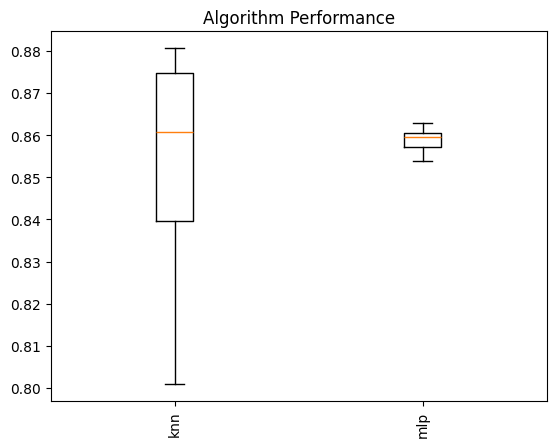

In [25]:
import matplotlib as plt

model_comp = []
model_comp.append(knn_acc_score)
model_comp.append(mlp_acc_score)

fig, ax2 = plt.pyplot.subplots()
ax2.set_title('Algorithm Performance')
ax2.boxplot(model_comp)
ax2.set_xticklabels(['knn', 'mlp'], rotation='vertical')

Looking at this, the MLP is the better algorithm for consistency, but the kNN has the capability to produce higher accuracy scores but with more variability.